# DISCOVERING THE IDEAL LOCALITY FOR RENTING A HOUSE IN BANGALORE
###  Bengaluru( Bangalore) is known as the Silicon Valley of India, having half of it's residents as migrant population. This Project helps to identify rent prices for similar localities in bangalore 


In [460]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import requests
from scipy.spatial.distance import cdist

In [461]:
#plot properties
%matplotlib inline
rcParams['figure.figsize']= 8,5
sb.set_style('whitegrid')

I scraped 99acres.com to obtain the Rent dataset using beautiful soup

In [462]:
rent_data =pd.read_csv("Scrapped_rent.csv")
rent_data.head()

,Unnamed: 0,Title,Locality,Building,Price,Area in sqft,Number_of_Bedrooms,Number_of_Bathrooms,Description
0,0,1 Bedroom Independent House for rent in Whitef...,Whitefield,Nestaway-11283,"10,000","9,000",1.0,1.0,An excellent 1 bhk residential apartment for r...
1,1,2 BHK Independent Builder Floor for rent in Ga...,Garudachar Palya,NaN,"23,000",900,2.0,2.0,"Located at mahadevapura, bangalore, this beaut..."
2,2,3 BHK Residential Apartment for rent in Rajara...,Nagar,GRC Brundavan,"21,990","1,405",3.0,2.0,Come see this gorgeous 3 bkh residential apart...
3,3,2 BHK Residential Apartment for rent in Rayasa...,Rayasandra,SJR Parkway Homes,"18,000","1,135",2.0,2.0,Looking for an affordable apartment with best ...
4,4,3 BHK Residential Apartment for rent in Yelahanka,Yelahanka,Nitesh Columbus Square,"25,000","1,537",3.0,3.0,Looking for an apartment in the prime location...


## Columns in the Dataset
- Title : The title of the advertisement in the website
- Locality: Locality/Neighborhood of the property's location
- Building: Name of building or street of property's location
- Price : Monthly rent for the property in Indian Rupees
- Area in sqft: Area of the property in square feet measurement
- Number_of_Bedrooms : The number of bedrooms in a property	
- Number_of_Bathrooms : The number of bathrooms in a property
- Description: Owner's description about the property

In [463]:
#Data details
print(rent_data.shape)
print(rent_data.isnull().sum())

(4060, 9)
Unnamed: 0               0
Title                    0
Locality                 0
Building               997
Price                    9
Area in sqft             9
Number_of_Bedrooms       9
Number_of_Bathrooms      9
Description              0
dtype: int64


In [464]:
miss=rent_data.index[rent_data.Price.isnull()]
rent_data.drop(index=miss,inplace=True)
rent_data.reset_index()
print(rent_data.isnull().sum())
rent_data.head()

Unnamed: 0               0
Title                    0
Locality                 0
Building               990
Price                    0
Area in sqft             0
Number_of_Bedrooms       0
Number_of_Bathrooms      0
Description              0
dtype: int64


,Unnamed: 0,Title,Locality,Building,Price,Area in sqft,Number_of_Bedrooms,Number_of_Bathrooms,Description
0,0,1 Bedroom Independent House for rent in Whitef...,Whitefield,Nestaway-11283,"10,000","9,000",1.0,1.0,An excellent 1 bhk residential apartment for r...
1,1,2 BHK Independent Builder Floor for rent in Ga...,Garudachar Palya,NaN,"23,000",900,2.0,2.0,"Located at mahadevapura, bangalore, this beaut..."
2,2,3 BHK Residential Apartment for rent in Rajara...,Nagar,GRC Brundavan,"21,990","1,405",3.0,2.0,Come see this gorgeous 3 bkh residential apart...
3,3,2 BHK Residential Apartment for rent in Rayasa...,Rayasandra,SJR Parkway Homes,"18,000","1,135",2.0,2.0,Looking for an affordable apartment with best ...
4,4,3 BHK Residential Apartment for rent in Yelahanka,Yelahanka,Nitesh Columbus Square,"25,000","1,537",3.0,3.0,Looking for an apartment in the prime location...


In [465]:
rent_data.shape

(4051, 9)

In [466]:
#change type
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4051 entries, 0 to 4059
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4051 non-null   int64  
 1   Title                4051 non-null   object 
 2   Locality             4051 non-null   object 
 3   Building             3061 non-null   object 
 4   Price                4051 non-null   object 
 5   Area in sqft         4051 non-null   object 
 6   Number_of_Bedrooms   4051 non-null   float64
 7   Number_of_Bathrooms  4051 non-null   float64
 8   Description          4051 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 316.5+ KB


# Data cleaning
### Price and Area should be float data type, and numbers should be int

In [467]:
#typecasting  float to int
rent_data[['Number_of_Bedrooms','Number_of_Bathrooms']]=rent_data[['Number_of_Bedrooms','Number_of_Bathrooms']].astype(int)
rent_data.head()

,Unnamed: 0,Title,Locality,Building,Price,Area in sqft,Number_of_Bedrooms,Number_of_Bathrooms,Description
0,0,1 Bedroom Independent House for rent in Whitef...,Whitefield,Nestaway-11283,"10,000","9,000",1,1,An excellent 1 bhk residential apartment for r...
1,1,2 BHK Independent Builder Floor for rent in Ga...,Garudachar Palya,NaN,"23,000",900,2,2,"Located at mahadevapura, bangalore, this beaut..."
2,2,3 BHK Residential Apartment for rent in Rajara...,Nagar,GRC Brundavan,"21,990","1,405",3,2,Come see this gorgeous 3 bkh residential apart...
3,3,2 BHK Residential Apartment for rent in Rayasa...,Rayasandra,SJR Parkway Homes,"18,000","1,135",2,2,Looking for an affordable apartment with best ...
4,4,3 BHK Residential Apartment for rent in Yelahanka,Yelahanka,Nitesh Columbus Square,"25,000","1,537",3,3,Looking for an apartment in the prime location...


In [468]:
rent_data.Price.unique()

array(['10,000 ', '23,000 ', '21,990 ', '18,000 ', '25,000 ', '29,000 ',
       '22,000 ', '12,000 ', '20,000 ', '9,500 ', '28,500 ', '39,000 ',
       '11,000 ', '1.8 Lac ', '21,000 ', '7,500 ', '70,000 ', '16,000 ',
       '32,000 ', '75,000 ', '14,000 ', '95,000 ', '60,000 ', '15,000 ',
       '80,000 ', '35,000 ', '15,500 ', '9,000 ', '14,500 ', '13,000 ',
       '36,000 ', '38,000 ', '4 Lac ', '1.6 Lac ', '1.7 Lac ', '2.2 Lac ',
       '6,500 ', '85,000 ', '28,000 ', '1.1 Lac ', '1.5 Lac ', '40,000 ',
       '17,000 ', '30,000 ', '65,000 ', '50,000 ', '35,500 ', '42,000 ',
       '1 Lac ', '2 Lac ', '1.3 Lac ', '27,000 ', '63,000 ', '45,000 ',
       '54,000 ', '33,000 ', '11,500 ', '37,000 ', '12,500 ', '31,000 ',
       '55,000 ', '62,000 ', '1.4 Lac ', '1.2 Lac ', '24,500 ', '43,500 ',
       '24,000 ', '2.5 Lac ', '33,500 ', '24,300 ', '15,400 ', '16,800 ',
       '52,000 ', '10,500 ', '22,900 ', '17,500 ', '19,500 ', '59,000 ',
       '34,000 ', '38,500 ', '19,000 ', '22,400 

Looking at price column  some values have ',' between numbers  , and some has a float number + 'Lac', one value is in completely a string. We can use a for loop to clean this value

In [469]:
req=rent_data['Price'].index[rent_data['Price']=='ice on Request ']
rent_data.drop(index=req,inplace=True)
rent_data.reset_index()

rent_data.head()

,Unnamed: 0,Title,Locality,Building,Price,Area in sqft,Number_of_Bedrooms,Number_of_Bathrooms,Description
0,0,1 Bedroom Independent House for rent in Whitef...,Whitefield,Nestaway-11283,"10,000","9,000",1,1,An excellent 1 bhk residential apartment for r...
1,1,2 BHK Independent Builder Floor for rent in Ga...,Garudachar Palya,NaN,"23,000",900,2,2,"Located at mahadevapura, bangalore, this beaut..."
2,2,3 BHK Residential Apartment for rent in Rajara...,Nagar,GRC Brundavan,"21,990","1,405",3,2,Come see this gorgeous 3 bkh residential apart...
3,3,2 BHK Residential Apartment for rent in Rayasa...,Rayasandra,SJR Parkway Homes,"18,000","1,135",2,2,Looking for an affordable apartment with best ...
4,4,3 BHK Residential Apartment for rent in Yelahanka,Yelahanka,Nitesh Columbus Square,"25,000","1,537",3,3,Looking for an apartment in the prime location...


In [470]:
#Cleaning price
Prices=[]
for p in rent_data.Price:
    try:
        
        if len(p)==7:
            p= p.split(',')
            p=p[0]+p[1]

        elif len(p)==6:
            try:
                p= p.split(',')
                p=p[0]+p[1]
            except:
                
                n= p.split(' ')[0]
                p= float(n)* 100000
                       
           

        else:
            n= p.split(' ')[0]
            p= float(n)* 100000
    except:
        p=np.nan
    Prices.append(p)
        


Prices[0:5]

['10000 ', '23000 ', '21990 ', '18000 ', '25000 ']

In [471]:
# adding updated price column
rent_data['Price'] = Prices
rent_data.head()

,Unnamed: 0,Title,Locality,Building,Price,Area in sqft,Number_of_Bedrooms,Number_of_Bathrooms,Description
0,0,1 Bedroom Independent House for rent in Whitef...,Whitefield,Nestaway-11283,10000,"9,000",1,1,An excellent 1 bhk residential apartment for r...
1,1,2 BHK Independent Builder Floor for rent in Ga...,Garudachar Palya,NaN,23000,900,2,2,"Located at mahadevapura, bangalore, this beaut..."
2,2,3 BHK Residential Apartment for rent in Rajara...,Nagar,GRC Brundavan,21990,"1,405",3,2,Come see this gorgeous 3 bkh residential apart...
3,3,2 BHK Residential Apartment for rent in Rayasa...,Rayasandra,SJR Parkway Homes,18000,"1,135",2,2,Looking for an affordable apartment with best ...
4,4,3 BHK Residential Apartment for rent in Yelahanka,Yelahanka,Nitesh Columbus Square,25000,"1,537",3,3,Looking for an apartment in the prime location...


In [472]:
#cleaning area
Area=[]
for a in rent_data['Area in sqft']:
    if len(a)>= 5:
        a= a.split(',')
        a=a[0]+a[1]
    Area.append(a)
Area[0:5]

['9000', '900', '1405', '1135', '1537']

In [473]:
# adding updated area column
rent_data.drop('Area in sqft',axis=1,inplace=True)
rent_data['Area'] = Area
rent_data.head()

,Unnamed: 0,Title,Locality,Building,Price,Number_of_Bedrooms,Number_of_Bathrooms,Description,Area
0,0,1 Bedroom Independent House for rent in Whitef...,Whitefield,Nestaway-11283,10000,1,1,An excellent 1 bhk residential apartment for r...,9000
1,1,2 BHK Independent Builder Floor for rent in Ga...,Garudachar Palya,NaN,23000,2,2,"Located at mahadevapura, bangalore, this beaut...",900
2,2,3 BHK Residential Apartment for rent in Rajara...,Nagar,GRC Brundavan,21990,3,2,Come see this gorgeous 3 bkh residential apart...,1405
3,3,2 BHK Residential Apartment for rent in Rayasa...,Rayasandra,SJR Parkway Homes,18000,2,2,Looking for an affordable apartment with best ...,1135
4,4,3 BHK Residential Apartment for rent in Yelahanka,Yelahanka,Nitesh Columbus Square,25000,3,3,Looking for an apartment in the prime location...,1537


In [474]:
#typecasting  obj to float
rent_data[['Price','Area']]=rent_data[['Price','Area']].astype(float)
rent_data.head()

,Unnamed: 0,Title,Locality,Building,Price,Number_of_Bedrooms,Number_of_Bathrooms,Description,Area
0,0,1 Bedroom Independent House for rent in Whitef...,Whitefield,Nestaway-11283,10000.0,1,1,An excellent 1 bhk residential apartment for r...,9000.0
1,1,2 BHK Independent Builder Floor for rent in Ga...,Garudachar Palya,NaN,23000.0,2,2,"Located at mahadevapura, bangalore, this beaut...",900.0
2,2,3 BHK Residential Apartment for rent in Rajara...,Nagar,GRC Brundavan,21990.0,3,2,Come see this gorgeous 3 bkh residential apart...,1405.0
3,3,2 BHK Residential Apartment for rent in Rayasa...,Rayasandra,SJR Parkway Homes,18000.0,2,2,Looking for an affordable apartment with best ...,1135.0
4,4,3 BHK Residential Apartment for rent in Yelahanka,Yelahanka,Nitesh Columbus Square,25000.0,3,3,Looking for an apartment in the prime location...,1537.0


In [475]:
#Cleaning locality
Locality=[]
for t in rent_data.Title:
    i=t.find('in')
    loc=t[i+3:]
    Locality.append(loc)
    
Locality[0:5]

['Whitefield',
 'Garudachar Palya',
 'Rajarajeshwari Nagar',
 'Rayasandra',
 'Yelahanka']

In [476]:
#updating locality coulmn

rent_data['Locality'] = Locality
rent_data.head()

,Unnamed: 0,Title,Locality,Building,Price,Number_of_Bedrooms,Number_of_Bathrooms,Description,Area
0,0,1 Bedroom Independent House for rent in Whitef...,Whitefield,Nestaway-11283,10000.0,1,1,An excellent 1 bhk residential apartment for r...,9000.0
1,1,2 BHK Independent Builder Floor for rent in Ga...,Garudachar Palya,NaN,23000.0,2,2,"Located at mahadevapura, bangalore, this beaut...",900.0
2,2,3 BHK Residential Apartment for rent in Rajara...,Rajarajeshwari Nagar,GRC Brundavan,21990.0,3,2,Come see this gorgeous 3 bkh residential apart...,1405.0
3,3,2 BHK Residential Apartment for rent in Rayasa...,Rayasandra,SJR Parkway Homes,18000.0,2,2,Looking for an affordable apartment with best ...,1135.0
4,4,3 BHK Residential Apartment for rent in Yelahanka,Yelahanka,Nitesh Columbus Square,25000.0,3,3,Looking for an apartment in the prime location...,1537.0


In [477]:
#if sum errors happened in cleaning drop nan of prices
miss=rent_data.index[rent_data.Price.isnull()]
rent_data.drop(index=miss,inplace=True)
rent_data.reset_index()
print(rent_data.isnull().sum())
rent_data.head()

Unnamed: 0               0
Title                    0
Locality                 0
Building               971
Price                    0
Number_of_Bedrooms       0
Number_of_Bathrooms      0
Description              0
Area                     0
dtype: int64


,Unnamed: 0,Title,Locality,Building,Price,Number_of_Bedrooms,Number_of_Bathrooms,Description,Area
0,0,1 Bedroom Independent House for rent in Whitef...,Whitefield,Nestaway-11283,10000.0,1,1,An excellent 1 bhk residential apartment for r...,9000.0
1,1,2 BHK Independent Builder Floor for rent in Ga...,Garudachar Palya,NaN,23000.0,2,2,"Located at mahadevapura, bangalore, this beaut...",900.0
2,2,3 BHK Residential Apartment for rent in Rajara...,Rajarajeshwari Nagar,GRC Brundavan,21990.0,3,2,Come see this gorgeous 3 bkh residential apart...,1405.0
3,3,2 BHK Residential Apartment for rent in Rayasa...,Rayasandra,SJR Parkway Homes,18000.0,2,2,Looking for an affordable apartment with best ...,1135.0
4,4,3 BHK Residential Apartment for rent in Yelahanka,Yelahanka,Nitesh Columbus Square,25000.0,3,3,Looking for an apartment in the prime location...,1537.0


In [478]:
#reorder dataframe
rent_data.drop('Unnamed: 0',axis=1,inplace=True)
rent_data.rename(columns={'Building':'Building/Area'},inplace=True)


In [479]:
cols = rent_data.columns.tolist()
cols = cols[:4]+cols[-1:]+cols[4:7]
rent_data= rent_data[cols]
rent_data.head()

,Title,Locality,Building/Area,Price,Area,Number_of_Bedrooms,Number_of_Bathrooms,Description
0,1 Bedroom Independent House for rent in Whitef...,Whitefield,Nestaway-11283,10000.0,9000.0,1,1,An excellent 1 bhk residential apartment for r...
1,2 BHK Independent Builder Floor for rent in Ga...,Garudachar Palya,NaN,23000.0,900.0,2,2,"Located at mahadevapura, bangalore, this beaut..."
2,3 BHK Residential Apartment for rent in Rajara...,Rajarajeshwari Nagar,GRC Brundavan,21990.0,1405.0,3,2,Come see this gorgeous 3 bkh residential apart...
3,2 BHK Residential Apartment for rent in Rayasa...,Rayasandra,SJR Parkway Homes,18000.0,1135.0,2,2,Looking for an affordable apartment with best ...
4,3 BHK Residential Apartment for rent in Yelahanka,Yelahanka,Nitesh Columbus Square,25000.0,1537.0,3,3,Looking for an apartment in the prime location...


In [480]:
#rent_data.to_csv("Banglore_rent.csv")

In [481]:
rent_data.shape

(3986, 8)

In [482]:
len(rent_data.Locality.unique()) 


957

###### there is too many localities so we take only standard neigbourhoods in banglore as given in wikipedia

In [483]:
# load wikipedia table as dataframe
table= pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore',header=0)
blr_locality = pd.DataFrame()
for i in range(8):
    blr_locality=blr_locality.append(table[i])
blr_locality.reset_index(drop=True,inplace=True)
blr_locality

,Name,Image,Summary
0,Cantonment area,NaN,The Cantonment area in Bangalore was used as a...
1,Domlur,NaN,"Formerly part of the Cantonment area, Domlur h..."
2,Indiranagar,NaN,Indiranagar is a sought-after residential and ...
3,Jeevanbheemanagar,NaN,NaN
4,Malleswaram,NaN,NaN
...,...,...,...
60,Nandini Layout,NaN,NaN
61,Nayandahalli,NaN,Nayandahalli is a transport junction in the we...
62,Rajajinagar,NaN,NaN
63,Rajarajeshwari Nagar,NaN,Located in the south-western part of the city ...


65 localities that is better

In [484]:
blr=list(blr_locality['Name'])
blr[0:5]

['Cantonment area',
 'Domlur',
 'Indiranagar',
 'Jeevanbheemanagar',
 'Malleswaram']

In [485]:
rent_nw= rent_data.loc[rent_data['Locality'].isin(blr)]
rent_nw.head()

,Title,Locality,Building/Area,Price,Area,Number_of_Bedrooms,Number_of_Bathrooms,Description
0,1 Bedroom Independent House for rent in Whitef...,Whitefield,Nestaway-11283,10000.0,9000.0,1,1,An excellent 1 bhk residential apartment for r...
2,3 BHK Residential Apartment for rent in Rajara...,Rajarajeshwari Nagar,GRC Brundavan,21990.0,1405.0,3,2,Come see this gorgeous 3 bkh residential apart...
4,3 BHK Residential Apartment for rent in Yelahanka,Yelahanka,Nitesh Columbus Square,25000.0,1537.0,3,3,Looking for an apartment in the prime location...
9,1 BHK Independent Builder Floor for rent in Va...,Varthur,NaN,9500.0,800.0,1,1,A promise to the buyers and investors to provi...
16,3 BHK Residential Apartment for rent in Hebbal,Hebbal,Karle Zenith Residences,70000.0,2430.0,3,4,"3 bhk apartment for rent in hebbal, bangalore ..."


In [486]:
rent_nw.shape

(656, 8)

In [487]:
rent_nw.Locality.value_counts()

Whitefield              114
Hebbal                   57
Yeshwanthpur             56
Marathahalli             39
CV Raman Nagar           33
Yelahanka                31
Bellandur                24
Electronic City          24
Hulimavu                 20
Koramangala              20
HSR Layout               16
Arekere                  15
Mahalakshmi Layout       14
Horamavu                 12
Varthur                  12
Ramamurthy Nagar         11
Hoodi                    11
Ulsoor                   10
Kengeri                  10
HBR Layout                9
Lingarajapuram            8
Rajarajeshwari Nagar      8
Banashankari              8
Begur                     8
Kammanahalli              7
Nandini Layout            7
Domlur                    6
Nagarbhavi                6
Peenya                    6
BTM Layout                6
Gottigere                 6
Padmanabhanagar           6
Uttarahalli               5
Mahadevapura              5
Mathikere                 3
Banaswadi           

We have eliminated a lot of data from the website, to categorize every sub area into main locality is time consuming.
Our imputed data has 656 rows comprising 46 localities which is okay for our project, we are not finding area, we are trying to cluster similar areas, if needed we can add these info too

In [488]:
# drop areas with less than 5 records
l=['Anjanapura','Kumaraswamy Layout','Mathikere','Banaswadi','Vijayanagar','Vidyaranyapura','J. P. Nagar','Bommanahalli',
                                   'Basavanagudi','Madiwala','Indiranagar','Bommasandra']

rent_nw=rent_nw[~rent_nw.Locality.isin(l)]
rent_nw.reset_index(drop=True)
print(rent_nw.shape)
rent_nw.head()


(630, 8)


,Title,Locality,Building/Area,Price,Area,Number_of_Bedrooms,Number_of_Bathrooms,Description
0,1 Bedroom Independent House for rent in Whitef...,Whitefield,Nestaway-11283,10000.0,9000.0,1,1,An excellent 1 bhk residential apartment for r...
2,3 BHK Residential Apartment for rent in Rajara...,Rajarajeshwari Nagar,GRC Brundavan,21990.0,1405.0,3,2,Come see this gorgeous 3 bkh residential apart...
4,3 BHK Residential Apartment for rent in Yelahanka,Yelahanka,Nitesh Columbus Square,25000.0,1537.0,3,3,Looking for an apartment in the prime location...
9,1 BHK Independent Builder Floor for rent in Va...,Varthur,NaN,9500.0,800.0,1,1,A promise to the buyers and investors to provi...
16,3 BHK Residential Apartment for rent in Hebbal,Hebbal,Karle Zenith Residences,70000.0,2430.0,3,4,"3 bhk apartment for rent in hebbal, bangalore ..."


In [489]:
# number of LOcalities we are considering
len(rent_nw.Locality.unique())

34

# Extrapoletory Data Analysis

Let us try to understand how price is related with the attributes. 
Plotting Number of bedrooms vs price

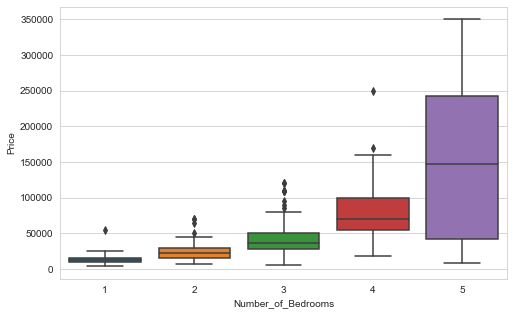

In [490]:
sb.boxplot(x=rent_nw.Number_of_Bedrooms,y=rent_nw.Price)
plt.show()


There is no much surprises here as there is a clear increase in price when the number of bedrooms increases. There is some overlap between 4 bed room and 5 bedroom houses, that is an indication of impact of other attributes.Now let us plot Number of bathrooms versus price

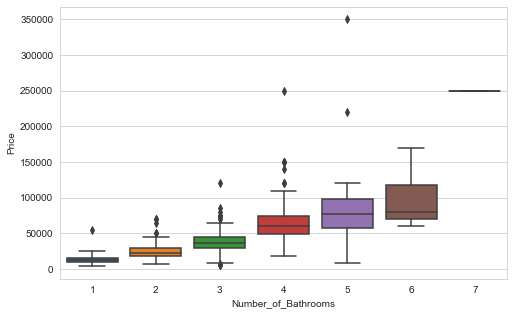

In [491]:
sb.boxplot(x=rent_nw.Number_of_Bathrooms,y=rent_nw.Price)
plt.show()


Same as the case of number of bedrooms, the higher the number of bathrooms higher the price. Also the price range doesn't have a bigger variation, suggesting that number of bathrooms are not impacting price as the number of bedrooms.
Now lets look at area vs price. Area is in sqft measurements

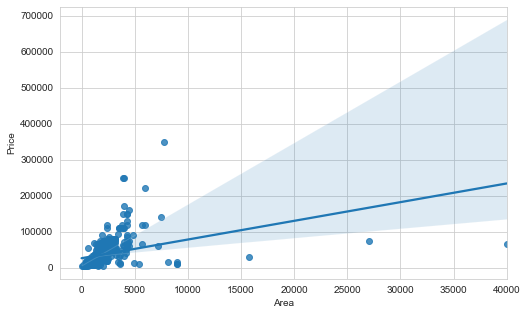

In [492]:
sb.regplot(x=rent_nw.Area,y=rent_nw.Price)
plt.show()


We can see a linear correlation between area. But it is not a very strong one. This suggests that locality might have a bigger impact on the rent price than all the above attributes. So lets  plot average price of each area.

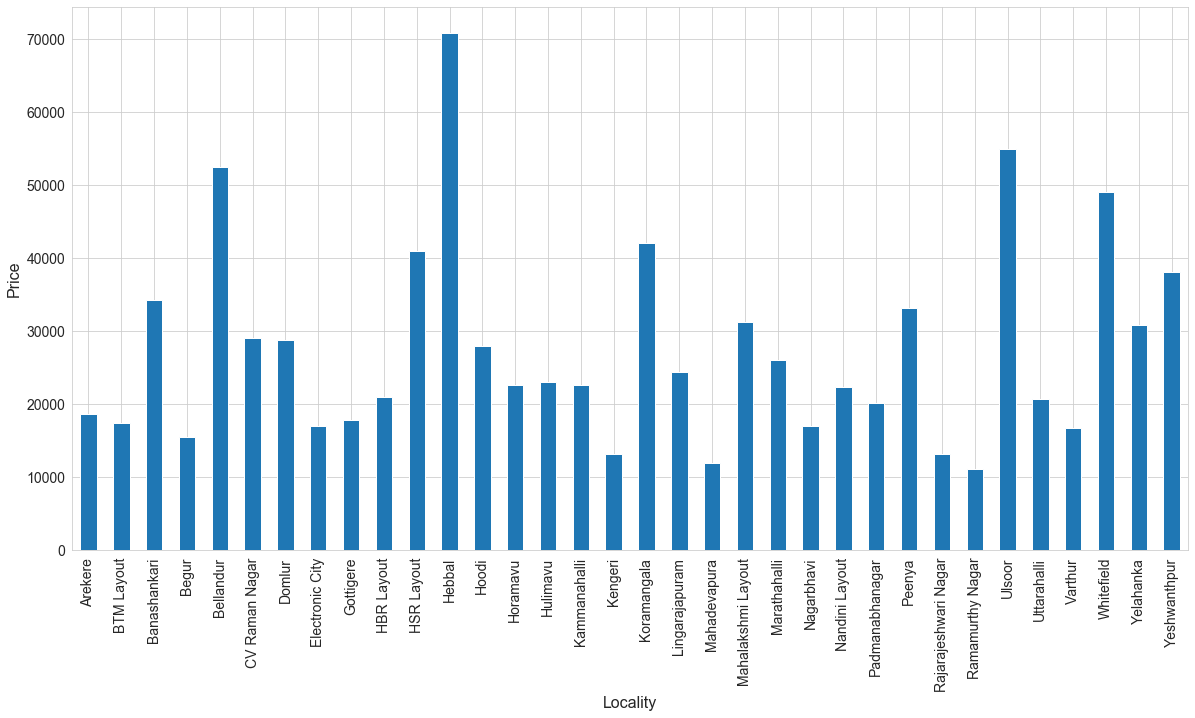

In [493]:
#Average prices in each locality
grp= rent_nw[['Locality','Price']].groupby(['Locality']).mean()
ax =grp.plot(kind='bar',figsize=(20,10))
ax.set_ylabel('Price',fontdict={'fontsize':16})
ax.set_xlabel('Locality',fontdict={'fontsize':16})
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.get_legend().remove()


Hebbal's average monthly rent is around INR 72,000 and it fits perfectly for the real world as hebbal is the most expensive locality in bangalore, so the dataset is a good representation of the real world data. Lets see what is the average number of bedrooms in each locality

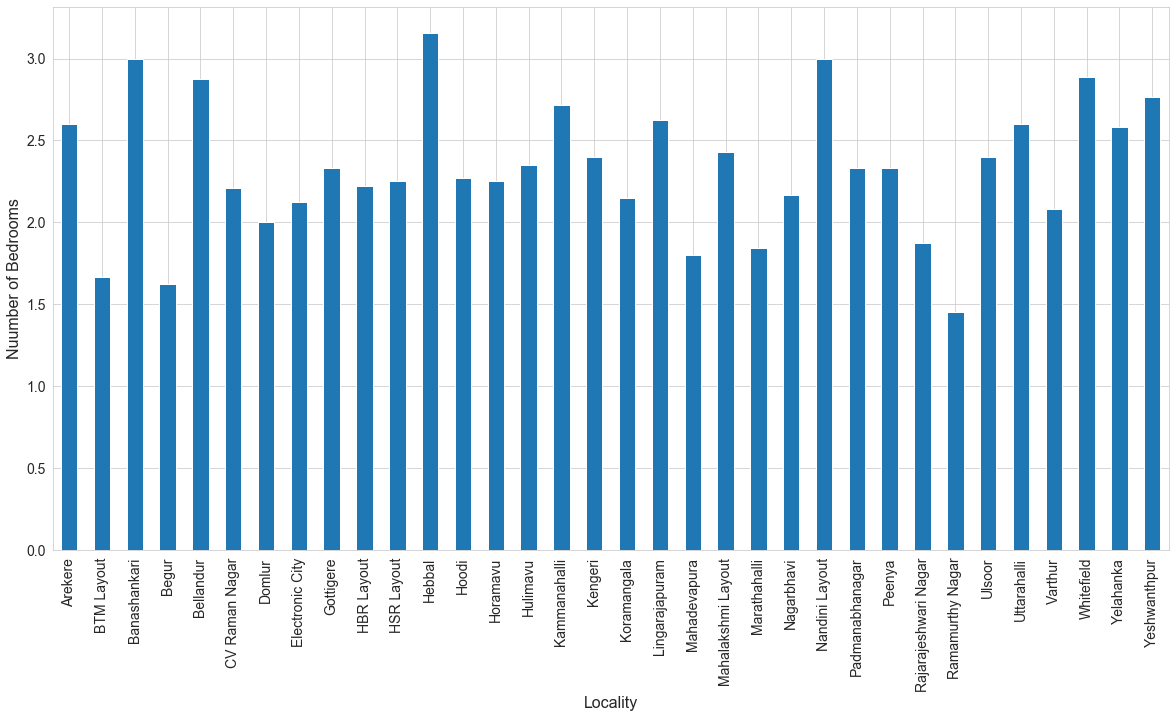

In [494]:
#Average Number of bedrooms in each locality
e1= rent_nw.copy()
e1=e1[['Locality','Number_of_Bedrooms']].groupby(['Locality']).mean()
ax=e1.plot(kind='bar',figsize=(20,10))
ax.set_xlabel('Locality',fontdict={'fontsize':16})
ax.set_ylabel('Nuumber of Bedrooms',fontdict={'fontsize':16})
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.get_legend().remove()


By looking at the plot we can see there is something interesting here in areas with highest Number of Bedrooms is not the ones with highest prices. Lets look at average of Number of Bathrooms of Locality

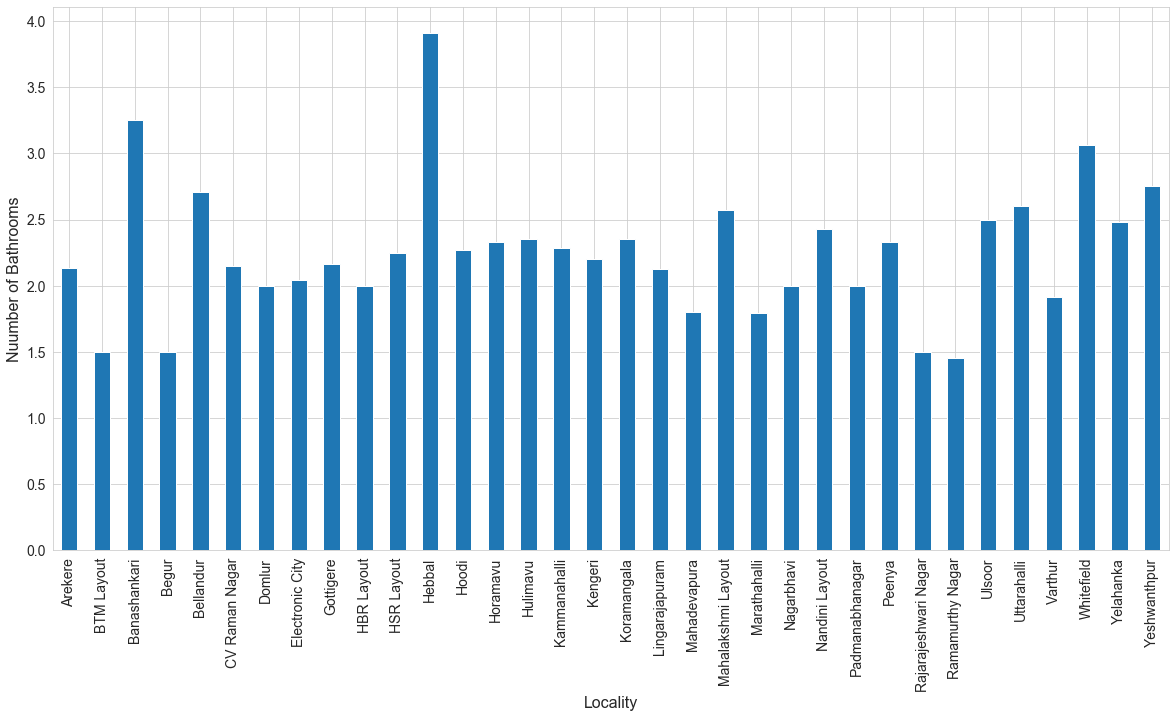

In [495]:
#Average Number of bathrooms in each locality
e2= rent_nw.copy()
e2=e2[['Locality','Number_of_Bathrooms']].groupby(['Locality']).mean()
ax=e2.plot(kind='bar',figsize=(20,10))
ax.set_ylabel('Nuumber of Bathrooms',fontdict={'fontsize':16})
ax.set_xlabel('Locality',fontdict={'fontsize':16})
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

ax.get_legend().remove()


It is similar to Number of bedrooms, Highest Price and Number of Bathrooms is not always  on the same Locality.Finally lets look at locality versus area.

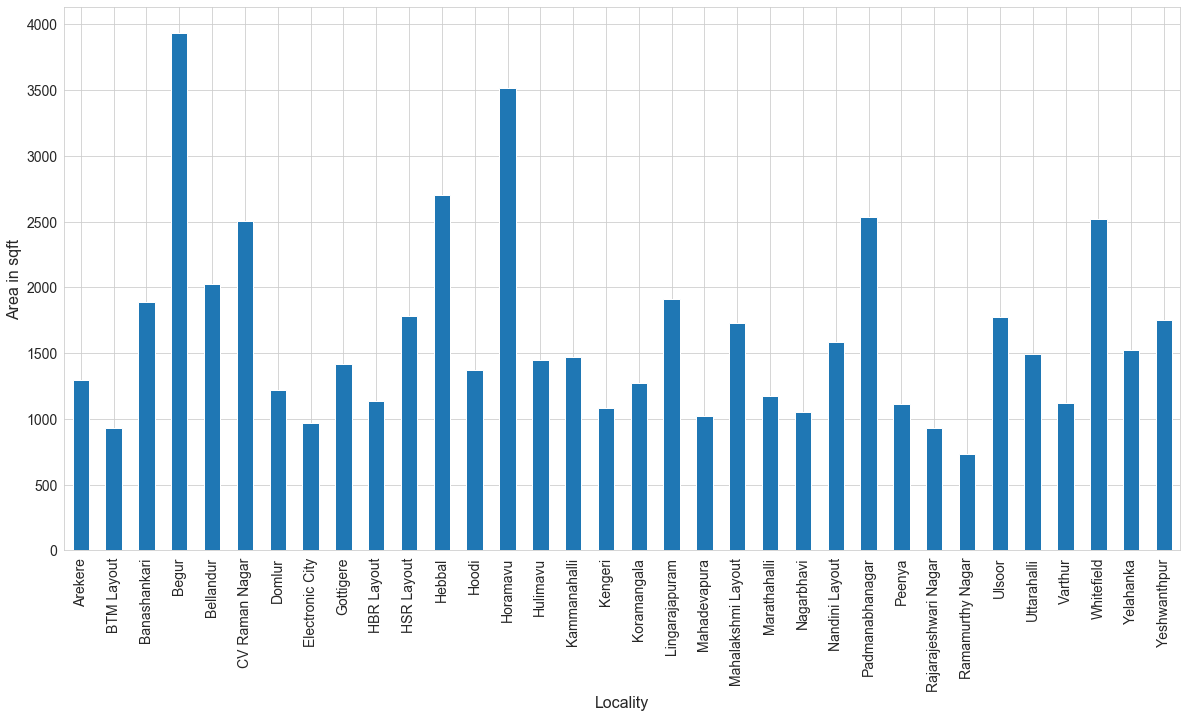

In [496]:
#Average Area per sqft in each locality
e3= rent_nw.copy()
e3=e3[['Locality','Area']].groupby(['Locality']).mean()

ax=e3.plot(kind='bar',figsize=(20,10))
ax.set_ylabel('Area in sqft',fontdict={'fontsize':16})
ax.set_xlabel('Locality',fontdict={'fontsize':16})
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

ax.get_legend().remove()


Wow, here Hebbal is not having the highest area. But earlier we have seen that price is correlated with area, which means the Locality 'Hebbal' is contributing more than the Area, Number of Bedrooms and Number of bathrooms to the rent price

Now that we have clearly defined that Locality  impacts on the rent price.Lets cluster these on the basis of venues and try to find out if there is any Localities  where  the highest value will be for rent i.e. Lowest price in a cluster 

# Geocoding all 34 Localities

###### I tried Nominatim several times but it is not  doing good for me, so i gecoded these areas using google sheets with an addon Gecode by Awesome Table which did the job very fast, so i am going to load the csv

In [497]:
geo = pd.read_csv('Geo.csv')
geo.head()

,Unnamed: 0,Locality,Latitude,Longitude
0,0,Whitefield,12.969820,77.749972
1,1,Rajarajeshwari Nagar,12.914860,77.520640
2,2,Yelahanka,13.115466,77.606998
3,3,Varthur,12.938879,77.741205
4,4,Hebbal,13.035356,77.598787


In [498]:
# some basic cleaning 
geo.drop(columns=['Unnamed: 0'],inplace=True,axis=1)
geo.head()
    

,Locality,Latitude,Longitude
0,Whitefield,12.969820,77.749972
1,Rajarajeshwari Nagar,12.914860,77.520640
2,Yelahanka,13.115466,77.606998
3,Varthur,12.938879,77.741205
4,Hebbal,13.035356,77.598787


In [499]:
Blr_Locality = pd.merge(grp,geo,on= 'Locality')
Blr_Locality

,Locality,Price,Latitude,Longitude
0,Arekere,18630.000000,12.887388,77.596887
1,BTM Layout,17483.333333,12.916576,77.610116
2,Banashankari,34262.500000,12.925453,77.546757
3,Begur,15487.500000,12.878767,77.637668
4,Bellandur,52435.416667,12.930428,77.678404
5,CV Raman Nagar,29063.636364,12.979325,77.664184
6,Domlur,28825.000000,12.960986,77.638732
7,Electronic City,17035.416667,12.845215,77.660169
8,Gottigere,17850.000000,12.856443,77.588845
9,HBR Layout,21022.222222,13.035324,77.628470


# Getting Venues Using Foursquare

In [501]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500,LIMIT=75):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)   
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [502]:
blr_venues = getNearbyVenues(names=Blr_Locality['Locality'],
                                   latitudes=Blr_Locality['Latitude'],
                                   longitudes=Blr_Locality['Longitude'])

Arekere
BTM Layout
Banashankari
Begur
Bellandur
CV Raman Nagar
Domlur
Electronic City
Gottigere
HBR Layout
HSR Layout
Hebbal
Hoodi
Horamavu
Hulimavu
Kammanahalli
Kengeri
Koramangala
Lingarajapuram
Mahadevapura
Mahalakshmi Layout
Marathahalli
Nagarbhavi
Nandini Layout
Padmanabhanagar
Peenya
Rajarajeshwari Nagar
Ramamurthy Nagar
Ulsoor
Uttarahalli
Varthur
Whitefield
Yelahanka
Yeshwanthpur


In [503]:
print(blr_venues.shape)
blr_venues.head()

(1231, 7)


,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arekere,12.887388,77.596887,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
1,Arekere,12.887388,77.596887,Natural Ice Cream,12.892188,77.598222,Ice Cream Shop
2,Arekere,12.887388,77.596887,Chavadi,12.892199,77.602538,BBQ Joint
3,Arekere,12.887388,77.596887,Swensens,12.876071,77.595542,Ice Cream Shop
4,Arekere,12.887388,77.596887,Cinepolis,12.876119,77.595455,Multiplex


In [504]:
blr_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
Arekere,60,60,60,60,60,60
BTM Layout,75,75,75,75,75,75
Banashankari,31,31,31,31,31,31
Begur,15,15,15,15,15,15
Bellandur,58,58,58,58,58,58
CV Raman Nagar,18,18,18,18,18,18
Domlur,75,75,75,75,75,75
Electronic City,41,41,41,41,41,41
Gottigere,9,9,9,9,9,9


In [505]:
print('There are {} uniques categories.'.format(len(blr_venues['Venue Category'].unique())))

There are 156 uniques categories.


In [506]:
# one hot encoding
blr_onehot = pd.get_dummies(blr_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
blr_onehot['Locality'] = blr_venues['Locality'] 

# move Locality column to the first column
fixed_columns = [blr_onehot.columns[-1]] + list(blr_onehot.columns[:-1])
blr_onehot = blr_onehot[fixed_columns]

blr_grouped = blr_onehot.groupby('Locality').mean().reset_index()
blr_grouped

,Locality,Accessories Store,American Restaurant,Andhra Restaurant,Arcade,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,...,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Arekere,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.016667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,BTM Layout,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,0.000,0.000000,0.013333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000
2,Banashankari,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Begur,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000,0.066667,0.066667,...,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Bellandur,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,CV Raman Nagar,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Domlur,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000,0.000000,0.026667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,0.013333,0.000000,0.000000
7,Electronic City,0.000000,0.000000,0.000000,0.000000,0.048780,0.000000,0.000,0.000000,0.024390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Gottigere,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,HBR Layout,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086957,0.000000,0.000000,0.000000


In [507]:
print(blr_grouped.shape)

(34, 157)


In [508]:
#function for sorting venues in a descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
# top 10 venues
num_top_venues = 25

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
blr_venues_sorted = pd.DataFrame(columns=columns)
blr_venues_sorted['Locality'] = blr_grouped['Locality']

for ind in np.arange(blr_grouped.shape[0]):
    blr_venues_sorted.iloc[ind, 1:] = return_most_common_venues(blr_grouped.iloc[ind, :], num_top_venues)

#blr_venues_sorted.head()

# Clustering using Kmeans

In [509]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

### K value was selected by trail and error as elbow method did not give any elbow point

In [510]:
# set number of clusters
kclusters = 12

blr_grouped_clustering = blr_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(blr_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([8, 3, 0, 7, 7, 3, 0, 7, 5, 8])

In [511]:
# add clustering labels
blr_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

blr_merged = Blr_Locality


# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
blr_merged = blr_merged.merge(blr_venues_sorted.set_index('Locality'), on='Locality')
blr_merged.head()

,Locality,Price,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
0,Arekere,18630.000000,12.887388,77.596887,8,Indian Restaurant,Café,Pizza Place,Ice Cream Shop,Fast Food Restaurant,...,Mexican Restaurant,Cosmetics Shop,Brewery,Men's Store,Lounge,Liquor Store,Dive Bar,Dumpling Restaurant,Electronics Store,Italian Restaurant
1,BTM Layout,17483.333333,12.916576,77.610116,3,Indian Restaurant,Café,Coffee Shop,Ice Cream Shop,Bakery,...,Clothing Store,Gym,Tea Room,Dim Sum Restaurant,Park,BBQ Joint,Asian Restaurant,Italian Restaurant,Indie Movie Theater,Furniture / Home Store
2,Banashankari,34262.500000,12.925453,77.546757,0,Indian Restaurant,Pizza Place,Café,Breakfast Spot,Juice Bar,...,Snack Place,North Indian Restaurant,Toy / Game Store,Tea Room,Bakery,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop
3,Begur,15487.500000,12.878767,77.637668,7,Indian Restaurant,Hotel,Lake,Coffee Shop,Theater,...,Event Space,Electronics Store,Dumpling Restaurant,Dessert Shop,Donut Shop,Dive Bar,Financial or Legal Service,Diner,Department Store,Dim Sum Restaurant
4,Bellandur,52435.416667,12.930428,77.678404,7,Café,Hotel,Fast Food Restaurant,Indian Restaurant,Coffee Shop,...,Food Court,Intersection,North Indian Restaurant,Burrito Place,Recreation Center,Dessert Shop,Hotel Bar,Multiplex,Liquor Store,Bar


In [512]:
# create map
map_clusters = folium.Map(location=[12.8516, 77.5946], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(blr_merged['Latitude'], blr_merged['Longitude'], blr_merged['Locality'], blr_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

 Now that we have clustered the 34 localities lets sort them on the basis of average price

In [513]:
blr_merged.loc[blr_merged['Cluster Labels'] == 0,['Locality','Price','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].sort_values('Price')

,Locality,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Nagarbhavi,17066.666667,Café,Indian Restaurant,Lighthouse,Andhra Restaurant,Breakfast Spot,Dance Studio,Construction & Landscaping,Bus Station,Market,South Indian Restaurant
6,Domlur,28825.000000,Indian Restaurant,Ice Cream Shop,Restaurant,Asian Restaurant,Burger Joint,Bar,Lounge,Pub,Spa,Chinese Restaurant
2,Banashankari,34262.500000,Indian Restaurant,Pizza Place,Café,Breakfast Spot,Juice Bar,Department Store,Accessories Store,Soccer Field,Fried Chicken Joint,Fast Food Restaurant
17,Koramangala,42100.000000,Indian Restaurant,Café,Ice Cream Shop,Bakery,Dessert Shop,Coffee Shop,Mobile Phone Shop,Lounge,Juice Bar,Italian Restaurant
28,Ulsoor,54950.000000,Indian Restaurant,Pub,Café,Hotel,Bar,Andhra Restaurant,Asian Restaurant,Chinese Restaurant,Clothing Store,Department Store


The algortithm succesfully clustered the oldest Localities in Bangalore in this Cluster.

In [514]:
blr_merged.loc[blr_merged['Cluster Labels'] == 1,['Locality','Price','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].sort_values('Price')

,Locality,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Kengeri,13170.0,Food Court,Fast Food Restaurant,Farm,Asian Restaurant,Dumpling Restaurant,Financial or Legal Service,Falafel Restaurant,Event Space,Electronics Store,Eastern European Restaurant


Since this locality is surrounded by  coconut farms unlike any other Locality this is clustered seperately

In [515]:
blr_merged.loc[blr_merged['Cluster Labels'] == 2,['Locality','Price','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].sort_values('Price')

,Locality,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Yelahanka,30811.290323,Vegetarian / Vegan Restaurant,Indian Restaurant,Food Truck,Lake,Yoga Studio,Donut Shop,Farm,Falafel Restaurant,Event Space,Electronics Store


Yelahanka is more like a sattelite area to banglore this is the farthest from the city centre so it is clustered seperately

In [516]:
blr_merged.loc[blr_merged['Cluster Labels'] == 3,['Locality','Price','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].sort_values('Price')

,Locality,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Ramamurthy Nagar,11063.636364,Indian Restaurant,Department Store,Ice Cream Shop,Pizza Place,Bus Station,South Indian Restaurant,Café,Supermarket,Liquor Store,Chinese Restaurant
26,Rajarajeshwari Nagar,13123.750000,Indian Restaurant,Café,Ice Cream Shop,Diner,Resort,Lake,Food Court,Juice Bar,Pizza Place,Bakery
1,BTM Layout,17483.333333,Indian Restaurant,Café,Coffee Shop,Ice Cream Shop,Bakery,Snack Place,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Diner,Department Store
15,Kammanahalli,22571.428571,Indian Restaurant,Café,Fast Food Restaurant,BBQ Joint,Ice Cream Shop,Chinese Restaurant,Korean Restaurant,Bakery,Restaurant,Pizza Place
21,Marathahalli,26107.692308,Indian Restaurant,Department Store,Ice Cream Shop,Sports Bar,Coffee Shop,Chinese Restaurant,Racetrack,Clothing Store,Andhra Restaurant,Vegetarian / Vegan Restaurant
5,CV Raman Nagar,29063.636364,Indian Restaurant,Café,Pizza Place,Clothing Store,Food & Drink Shop,Food Truck,Karnataka Restaurant,Chinese Restaurant,Sandwich Place,Shop & Service
11,Hebbal,70847.368421,Indian Restaurant,Fast Food Restaurant,Grocery Store,Lake,Department Store,Pizza Place,Coffee Shop,Supermarket,Gourmet Shop,Motorcycle Shop


This is the cluster of major residential localities in banglore. Ramamurthy Nagar is a very good option for people to move in as it is cheaper.

In [517]:
blr_merged.loc[blr_merged['Cluster Labels'] == 4,['Locality','Price','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].sort_values('Price')

,Locality,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Horamavu,22683.333333,Bakery,Andhra Restaurant,Athletics & Sports,Gym,Coffee Shop,Pizza Place,Kerala Restaurant,Donut Shop,Farm,Falafel Restaurant


Hormavu was a village which is noe transformed to a suburb of Bangalore, since it is in development it belongs in a seperate cluster

In [518]:
blr_merged.loc[blr_merged['Cluster Labels'] == 5,['Locality','Price','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].sort_values('Price')

,Locality,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Gottigere,17850.0,Indian Restaurant,Department Store,Gym / Fitness Center,Food Truck,Italian Restaurant,Bus Station,Yoga Studio,Dumpling Restaurant,Farm,Falafel Restaurant


This Locality is also Fast growing and since it is a lakeside area it has been clustered seperately

In [519]:
blr_merged.loc[blr_merged['Cluster Labels'] == 6,['Locality','Price','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].sort_values('Price')

,Locality,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Nandini Layout,22414.285714,Park,Ice Cream Shop,Bakery,Food Truck,Breakfast Spot,Snack Place,Construction & Landscaping,Asian Restaurant,Auto Workshop,Food & Drink Shop


This locality is called as the Central park of Bangalore, since it is a park area it belongs seperately

In [520]:
blr_merged.loc[blr_merged['Cluster Labels'] == 7,['Locality','Price','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].sort_values('Price')

,Locality,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Begur,15487.500000,Indian Restaurant,Hotel,Lake,Coffee Shop,Theater,Bus Station,Bakery,BBQ Joint,Restaurant,Automotive Shop
7,Electronic City,17035.416667,Coffee Shop,Indian Restaurant,Hotel,Fast Food Restaurant,Café,Asian Restaurant,Food Court,Food,Restaurant,Sandwich Place
12,Hoodi,27990.909091,Hotel,Brewery,Indian Restaurant,Café,Bed & Breakfast,Coffee Shop,Cafeteria,Bus Station,Office,Intersection
33,Yeshwanthpur,38117.857143,Hotel,Indian Restaurant,Miscellaneous Shop,Fast Food Restaurant,Restaurant,Food Court,Mediterranean Restaurant,Punjabi Restaurant,Bar,Coffee Shop
4,Bellandur,52435.416667,Café,Hotel,Fast Food Restaurant,Indian Restaurant,Coffee Shop,Lounge,Bakery,Gym,Sandwich Place,Kerala Restaurant


These cluster is what I call the entry points of bangalore you can see that this area is having a lot of hotels for visitors

In [521]:
blr_merged.loc[blr_merged['Cluster Labels'] == 8,['Locality','Price','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].sort_values('Price')

,Locality,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Mahadevapura,11950.000000,Coffee Shop,Clothing Store,Café,Multiplex,Donut Shop,Fast Food Restaurant,French Restaurant,Ice Cream Shop,Sporting Goods Shop,Movie Theater
0,Arekere,18630.000000,Indian Restaurant,Café,Pizza Place,Ice Cream Shop,Fast Food Restaurant,Department Store,Chinese Restaurant,South Indian Restaurant,Multiplex,Movie Theater
24,Padmanabhanagar,20100.000000,Indian Restaurant,Fast Food Restaurant,Pizza Place,Café,Clothing Store,Breakfast Spot,Ice Cream Shop,Shopping Mall,Snack Place,Food Truck
9,HBR Layout,21022.222222,Pizza Place,Indian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant,Shopping Mall,Lounge,Multiplex,Smoke Shop,Punjabi Restaurant,Karnataka Restaurant
14,Hulimavu,23040.400000,Café,Movie Theater,Indian Restaurant,Electronics Store,South Indian Restaurant,Multiplex,Bakery,Pizza Place,Shopping Mall,Boutique
18,Lingarajapuram,24425.000000,Fast Food Restaurant,Indian Restaurant,Café,Shopping Mall,South Indian Restaurant,Kerala Restaurant,Chinese Restaurant,Convenience Store,Multiplex,Burger Joint
20,Mahalakshmi Layout,31250.000000,Fast Food Restaurant,Indian Restaurant,Italian Restaurant,Clothing Store,Hotel,Coffee Shop,Multiplex,Café,Bowling Alley,Lounge
10,HSR Layout,40906.250000,Café,Indian Restaurant,Pizza Place,Ice Cream Shop,Department Store,Snack Place,Chinese Restaurant,Punjabi Restaurant,Italian Restaurant,Burger Joint
31,Whitefield,49082.885965,Hotel,Café,Pizza Place,Indian Restaurant,Multiplex,Restaurant,Eastern European Restaurant,Bakery,Brewery,Chinese Restaurant


These are the Residential Suburbs of Bangalore.

In [522]:
blr_merged.loc[blr_merged['Cluster Labels'] == 9,['Locality','Price','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].sort_values('Price')

,Locality,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Peenya,33166.666667,Fast Food Restaurant,Shopping Mall,Light Rail Station,Indian Restaurant,Coffee Shop,Multiplex,Dumpling Restaurant,Farm,Falafel Restaurant,Event Space


Peenya is an industrial locality, therefore it is clustered seperately

In [523]:
blr_merged.loc[blr_merged['Cluster Labels'] == 10,['Locality','Price','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].sort_values('Price')

,Locality,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Uttarahalli,20700.0,Indian Restaurant,Food Truck,Ice Cream Shop,Bakery,Pizza Place,Café,Restaurant,Sandwich Place,Burger Joint,Snack Place


It is a growing locality in bangalore, so it has no similarities with the other clusters

In [524]:
blr_merged.loc[blr_merged['Cluster Labels'] == 11,['Locality','Price','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']].sort_values('Price')

,Locality,Price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Varthur,16808.333333,Candy Store,Department Store,Indian Restaurant,Indie Movie Theater,Lake,Café,Supermarket,Yoga Studio,Farm,Falafel Restaurant


Varthur has a lot of educational Institutions and it is near to ITPB an IT park

The model worked effectively to cluster each areas in the cluster they belong, you can see the emerging Localities are mostly clustered by themselves because they are not yet similar to Cosmpolitan Banglore Localities